In [2]:
import numpy as np
import pandas as pd

In [3]:
import sys
sys.path.append("..")

In [4]:
import analysis as an

from utils import config, io, models
from analysis import select as se

In [5]:
name="USA"
numind=config.NUM_PREDICTORS
indicators=se.selection(name,numind)

In [7]:
predictors.to_csv("predictorsUSA.csv")

In [8]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
import time

In [12]:
indicators

IndicatorCode
NY.GDP.MKTP.KD.ZG       1.000000
NY.GDP.PCAP.KD.ZG       0.993832
NE.GDI.FTOT.KD.ZG       0.792708
NE.GDI.TOTL.KD.ZG       0.753418
NY.GNP.PCAP.KD.ZG       0.717879
NY.ADJ.NNTY.PC.KD.ZG    0.683277
NE.IMP.GNFS.KD.ZG       0.625850
NY.GNP.MKTP.KD.ZG       0.614340
NY.ADJ.NNTY.KD.ZG       0.609540
NE.CON.PRVT.PC.KD.ZG    0.583122
NE.GDI.TOTL.ZS          0.553337
NE.GDI.STKB.KN          0.543390
NE.CON.PETC.KD.ZG       0.540994
NE.GDI.STKB.CD          0.531263
NE.GDI.STKB.CN          0.531263
FR.INR.RISK             0.511990
TM.VAL.AGRI.ZS.UN       0.480630
NE.CON.PRVT.KD.ZG       0.474444
AG.LND.TRAC.ZS          0.471790
AG.AGR.TRAC.NO          0.467161
NE.CON.TETC.KD.ZG       0.457206
NY.GDS.TOTL.ZS          0.443749
NE.CON.TETC.ZS          0.443749
FI.RES.TOTL.CD          0.427062
TM.VAL.FOOD.ZS.UN       0.411213
NY.GSR.NFCY.CD          0.408765
NY.GSR.NFCY.CN          0.408765
GC.XPN.OTHR.CN          0.408721
TM.VAL.MMTL.ZS.UN       0.406283
TX.VAL.AGRI.ZS.UN       0.404

this is useless, we need the indicators whole this will only tell us which to select

In [6]:
predictors=se.indicators(name,numind)

In [9]:
predictors

IndicatorCode,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD,TX.VAL.OTHR.ZS.WT,TX.VAL.SERV.CD.WT,TX.VAL.TECH.CD,TX.VAL.TECH.MF.ZS,TX.VAL.TRAN.ZS.WT,TX.VAL.TRVL.ZS.WT,VC.BTL.DETH,VC.IHR.PSRC.P5
Year,,,,,,,,,,,,,,,,,,,,,
1960,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,2.053600e+10,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
1961,4690000.0,0.000000,0.000000,4475090.0,48.860242,180630000.0,0.983336,19.721671,64869558.0,0.205154,...,2.096000e+10,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
1962,4730000.0,0.000000,0.000000,4439910.0,48.476137,177095000.0,0.949378,19.335711,60548008.0,0.207010,...,2.161700e+10,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
1963,4755000.0,0.000000,0.000000,4414430.0,48.197940,179574000.0,0.948912,19.606375,62420208.0,0.204062,...,2.327600e+10,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
1964,4783000.0,0.000000,0.000000,4390120.0,47.932516,177966000.0,0.927442,19.430809,60977008.0,0.204499,...,2.648500e+10,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
1965,4800000.0,0.000000,0.000000,4358730.0,47.589792,177000000.0,0.910948,19.325338,60379266.0,0.204499,...,2.737580e+10,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
1966,5470000.0,0.000000,0.000000,4355500.0,47.554526,175705000.0,0.893900,19.183947,61141626.0,0.201442,...,3.040540e+10,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
1967,5450000.0,0.000000,0.000000,4353070.0,47.527994,174487000.0,0.878090,19.050962,65847777.0,0.198713,...,3.156440e+10,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000
1968,5390000.0,0.000000,0.000000,4357950.0,47.581276,181000000.0,0.901817,19.762069,63042026.0,0.195983,...,3.456760e+10,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000


In [10]:
gdpframe=predictors['NY.GDP.MKTP.KD.ZG']

In [11]:
gdpframe

Year
1960    0.000000
1961    2.300000
1962    6.100000
1963    4.400000
1964    5.800000
1965    6.400000
1966    6.500000
1967    2.500000
1968    4.800000
1969    3.100000
1970    3.206807
1971    3.295477
1972    5.263263
1973    5.643125
1974   -0.517155
1975   -0.197679
1976    5.386090
1977    4.608597
1978    5.561685
1979    3.175691
1980   -0.244596
1981    2.594470
1982   -1.910891
1983    4.632457
1984    7.259087
1985    4.238738
1986    3.511614
1987    3.461748
1988    4.203972
1989    3.680524
1990    1.919370
1991   -0.074085
1992    3.555396
1993    2.745857
1994    4.037643
1995    2.718976
1996    3.795881
1997    4.487026
1998    4.449911
1999    4.685200
2000    4.092176
2001    0.975982
2002    1.786128
2003    2.806776
2004    3.785743
2005    3.345216
2006    2.666626
2007    1.778570
2008   -0.291621
2009   -2.775530
2010    2.531921
Name: NY.GDP.MKTP.KD.ZG, dtype: float64

In [22]:
t=np.arange(len(gdpframe))

In [23]:
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [30]:
lin=np.polyfit(t,gdpframe,4)

In [31]:
lin

array([-1.85463681e-05,  1.73487726e-03, -5.16661101e-02,  4.93741359e-01,
        2.89494155e+00])

In [32]:
lin=np.poly1d(lin)

In [33]:
lin

poly1d([-1.85463681e-05,  1.73487726e-03, -5.16661101e-02,  4.93741359e-01,
        2.89494155e+00])

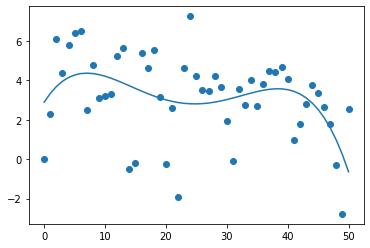

In [35]:
plt.plot(t,lin(t))
plt.scatter(t,gdpframe)
plt.show()

polyfit of gdp alone with a degree 4 polynomial

c:\users\oriol\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


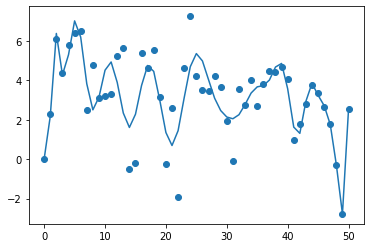

In [50]:
lin2=np.poly1d(np.polyfit(t,gdpframe,50))
plt.plot(t,lin2(t))
plt.scatter(t,gdpframe)
plt.show()

In [51]:
prediction1=lin2(51)

In [52]:
prediction1

-22830.290303038906

casi xd contando que tiene que ser un %

In [53]:
prediction2=lin(51)
prediction2

-1.6445054654222684

mucho mejor, el valor real es +1.6

conclusion, el fit polinomico de 1 var no va bien, tambien no enseña que no por mas grados del polinomio el fit sera mejor